on dispose de meilleurs résultats que pour V2 de bandpass V6 <br>
on va essayer l'autre outil d'arima du langage R

In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Plot one voxel from grey matter from merged normalized file

In [2]:
mergedfile = '/scratch/user/hirsch/datadir3/data_results_py/wcrat0009_epi_s04_d0001_merged.nii.gz'
merged =nib.load(mergedfile)
mergedarray = np.asarray(merged.dataobj).copy()

### mask grey matter

In [3]:
gmMask = '/scratch/user/hirsch/datadir3/data_results_py/structural/normalized_files/wc1t0009_t1_s03.nii'
gm =nib.load(gmMask)
gmarray = np.asarray(gm.dataobj).copy()
# threshold at 0,2
gmarray[(10 * gmarray )< 2] = 0
# binary mask the resulting image
gmarray[gmarray > 0] = 1
gm_transpose = np.transpose(np.nonzero(gmarray))
print gm_transpose

[[10 42 32]
 [10 42 33]
 [10 42 39]
 ..., 
 [80 47 34]
 [80 47 35]
 [80 48 33]]


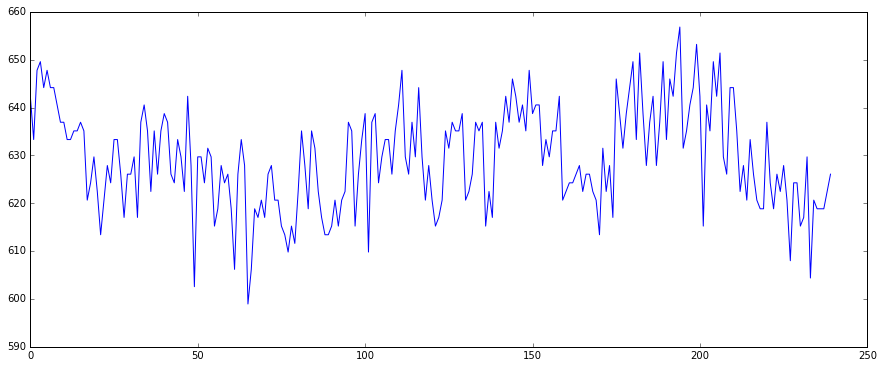

In [4]:
ts_merged =  mergedarray[10, 42,  39, :]
plt.plot(ts_merged)

## Plot same voxel after bandpass from merged normalized file

In [5]:
bpfile = '/scratch/user/hirsch/datadir3/data_results_py/wcrat0009_epi_s04_d0001_merged_bp.nii.gz'
bp =nib.load(bpfile)
bparray = np.asarray(bp.dataobj).copy()

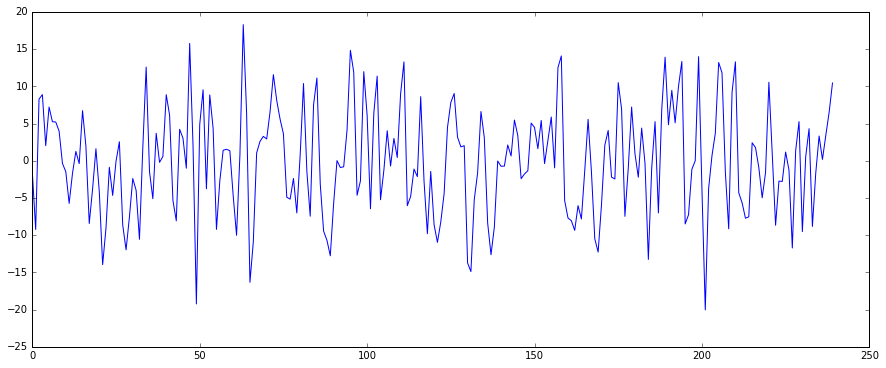

In [6]:
ts_bp =  bparray[10, 42,  39, :]
plt.plot(ts_bp)

# Arima version langage R

In [21]:
import rpy2.rinterface as rinterface

rinterface.initr()


0

In [24]:
# import and initialize
import rpy2.rinterface as ri
ri.initr()

# create a matrix
matrix = ri.baseenv["matrix"]

In [25]:
matrix = ts_bp

In [8]:
import rpy2
import rpy2.robjects as robjects


In [10]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [18]:
ts_r = matrix(ts_bp)

NameError: name 'matrix' is not defined

In [14]:
from rpy2 import robjects as ro
ro.conversion.py2ri = ro.numpy2ri
ro.numpy2ri.activate()

In [15]:
ts_r = ro.r.matrix(ts_bp)

TypeError: 'module' object is not callable

In [19]:
matrix = rinterface.globalenv.get("matrix")

NameError: name 'rinterface' is not defined

In [12]:
fit=forecast.auto_arima(ts_bp)

NameError: name 'forecast' is not defined

In [11]:
type(ts_bp)

numpy.ndarray

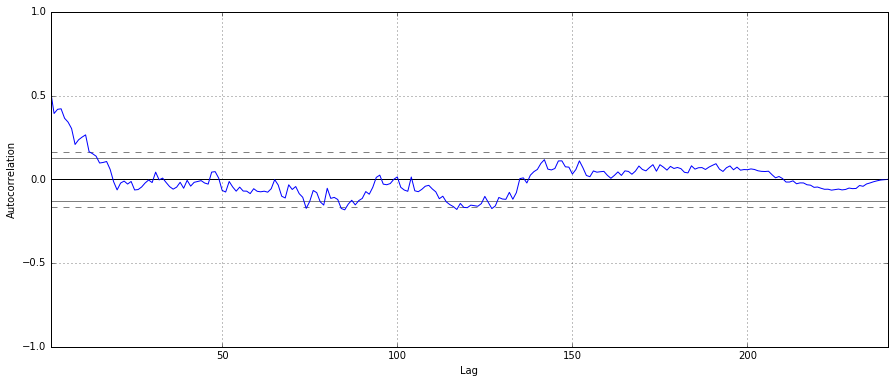

In [17]:
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(ts_merged)
pyplot.show()

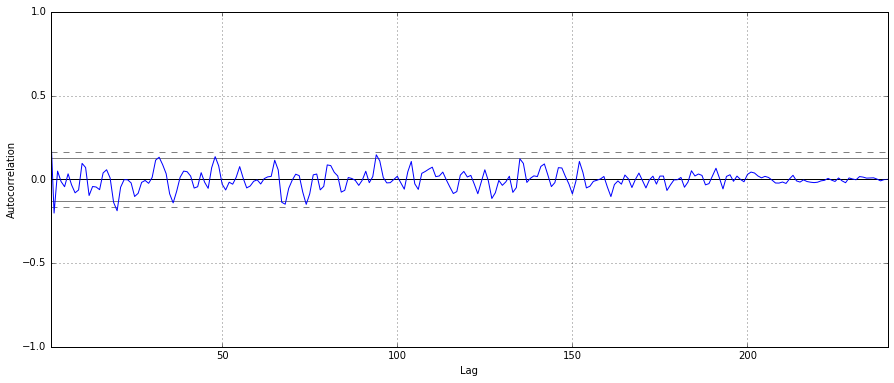

In [18]:
autocorrelation_plot(ts_bp)
pyplot.show()

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

for p in range(6):
    for d in range(2):
        for q in range(4):
            try:
                arima_mod=ARIMA(ts_bp,(p,d,q)).fit(transparams=True)

                x=arima_mod.aic

                x1= p,d,q
                print (x1,x)

                aic.append(x)
                pdq.append(x1)
            except:
                pass
                # ignore the error and go on

((0, 0, 0), 1627.09233393563)
((0, 0, 1), 1478.2537048152062)
((0, 0, 2), 1479.3570637592827)
((0, 1, 0), 1695.3687174352394)
((0, 1, 1), 1628.7009696703128)
((0, 1, 2), 1479.1879049638878)
((0, 1, 3), 1480.4654072627634)
((1, 0, 0), 1604.0737995073878)
((1, 1, 0), 1693.667887766464)
((2, 0, 0), 1577.89622881951)
((2, 1, 0), 1595.1710791876603)
((3, 0, 0), 1556.7773608080765)
((3, 1, 0), 1595.5148035444154)
((4, 0, 0), 1533.8580208145859)
((4, 1, 0), 1536.817199265442)
((5, 0, 0), 1514.1924863839236)
((5, 1, 0), 1534.3769808927882)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  239
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -843.834
Method:                       css-mle   S.D. of innovations              8.262
Date:                Thu, 13 Apr 2017   AIC                           1693.668
Time:                        15:23:13   BIC                           1704.097
Sample:                             1   HQIC                          1697.871
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0520      0.476      0.109      0.913        -0.880     0.984
ar.L1.D.y     -0.1240      0.064     -1.931      0.055        -0.250     0.002
                                    Roots           

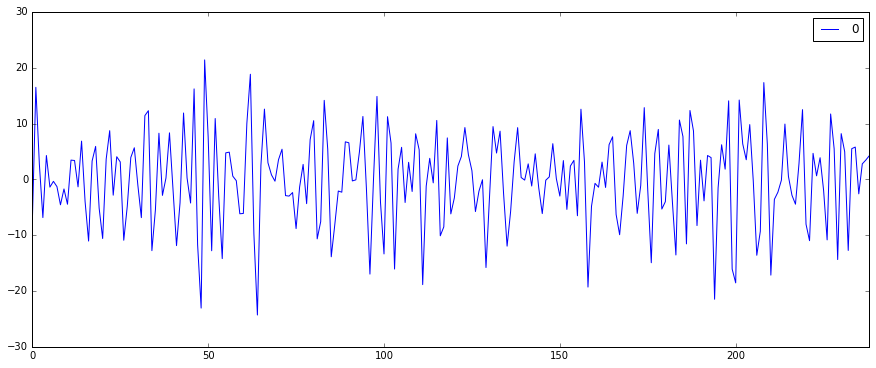

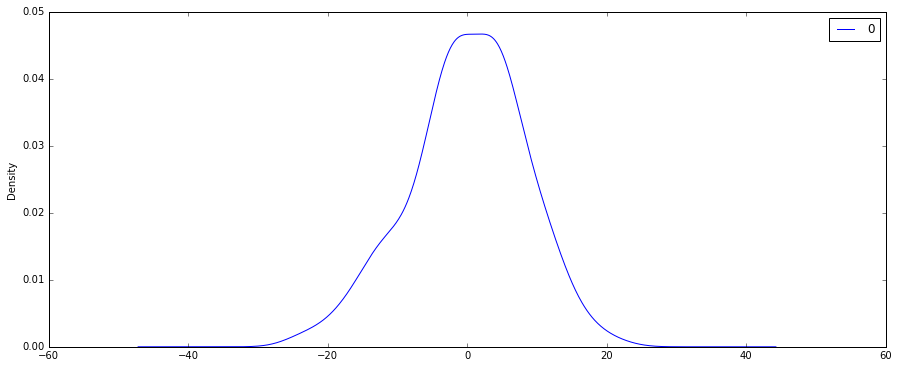

                0
count  239.000000
mean    -0.004017
std      8.279972
min    -24.303233
25%     -4.500739
50%     -0.060503
75%      5.485725
max     21.416684


In [21]:


from matplotlib import pyplot

# fit model
model = ARIMA(ts_bp, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [22]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=None, boxpierce=False)

acorr_ljungbox(residuals, lags=None, boxpierce=False)

(array([   1.26377876,   77.99085959,   84.65479187,   84.6660238 ,
          85.78850817,   88.29209704,   88.34447527,   89.29165401,
          91.37421812,   95.66185416,   98.51618041,  103.54584466,
         103.6313376 ,  103.63281186,  105.12402575,  105.96280925,
         107.23219244,  108.31883244,  110.26903578,  115.25888029,
         116.22424823,  116.72284561,  116.85589894,  117.2726296 ,
         118.50366378,  118.90363327,  119.26738379,  119.36684598,
         120.14587231,  120.72344158,  122.2968524 ,  123.0158793 ,
         123.05093451,  123.61219612,  124.327493  ,  127.07244471,
         127.12379405,  127.7706822 ,  127.98013897,  128.03820414]),
 array([  2.60937034e-01,   1.16011227e-17,   3.07789339e-18,
          1.78576952e-17,   5.14424159e-17,   6.85547026e-17,
          2.70548750e-16,   6.47514760e-16,   8.62532587e-16,
          4.00850870e-16,   3.51116768e-16,   1.12149685e-16,
          3.27136183e-16,   9.50945128e-16,   1.38326229e-15,
        

In [17]:
# rtj_coords = (-46, -68, 32)
imgarray[90, 108,  14, :]

array([ -2.63727397e-01,  -3.00078332e-01,   4.47391719e-03,
        -5.59085965e-01,   3.48878026e-01,   9.73491490e-01,
         4.79115903e-01,   9.95757937e-01,   2.97108173e-01,
        -5.19547284e-01,   2.79060081e-02,  -1.74437836e-01,
        -1.51665717e-01,  -4.12460417e-03,  -2.58601636e-01,
        -5.69550991e-02,  -2.41555497e-01,  -3.45733881e-01,
        -1.80880025e-01,  -2.77787805e-01,  -7.72425234e-02,
        -5.15229404e-02,  -1.59032241e-01,  -1.56047970e-01,
        -2.30981380e-01,  -2.85182595e-02,  -1.04647458e-01,
        -1.27673656e-01,   1.44288450e-01,  -3.20270807e-01,
         1.10478222e-01,   1.26235807e+00,   3.00465226e-01,
        -4.73758996e-01,   1.28245726e-01,  -2.71313071e-01,
        -1.64639056e-01,   9.06835571e-02,  -5.19190490e-01,
         3.79675239e-01,   8.57573211e-01,   3.60483408e-01,
         8.53272319e-01,   2.04747006e-01,  -5.31456351e-01,
        -1.94815695e-02,  -1.29711568e-01,  -1.18031204e-01,
        -6.26846179e-02,

## brouillons

In [ ]:
import nipype.interfaces.io as nio           # Data i/o
import nipype.interfaces.spm as spm          # spm
import nipype.interfaces.matlab as mlab      # how to run matlab
import nipype.interfaces.utility as util     # utility
import nipype.pipeline.engine as pe          # pypeline engine

from nipype.interfaces.utility import Function, IdentityInterface

from nipype.interfaces.fsl.maths import MathsCommand
from nipype.interfaces.fsl.utils import PlotMotionParams   # to plot moco variables
gmw = pe.Workflow(name='gmw')
sourcedir = '/scratch/user/hirsch/datadir3/data_results_py/structural/normalized_files'

from nipype import SelectFiles, Node
templates = dict(gmMask=sourcedir+ "/" + "wc1*.nii")

filesource = Node(SelectFiles(templates), "filesource")
filesource.inputs.subject_id = "subj1"
filesource.outputs.get()

from nipype.interfaces.fsl.maths import MathsCommand

erosion = pe.Node(interface=MathsCommand(), name='erosion')
    
erosion.inputs.args = '-thr 0 -uthr 111 -bin -ero  '     
erosion.inputs.ignore_exception = False     
erosion.inputs.output_type = 'NIFTI_GZ'     
erosion.inputs.terminal_output = 'stream'     
gmw.connect(filesource,"gmMask" , erosion, "in_file")


In [26]:
gm_transpose[9292]

array([19, 33, 12])